# Chargement et Préparation des Données

In [60]:
import pandas as pd

In [61]:
dfBook = pd.read_csv("books_data_t.csv/books_data_t.csv")
retrait= dfBook[["Image","Lien Google", "Date publication", "infoLink"]]

dfBook = dfBook[["Titre", "Description", "Auteurs", "Editeur", "Genre", "Nb scores"]]
dfBook = dfBook.dropna(subset=["Titre", "Auteurs", "Editeur", "Genre", "Nb scores"])
dfBook = dfBook.head(1000)

In [62]:
def nettoyer_genre(genre):

    if isinstance(genre, list):  
        return genre
    
    genre = genre.replace("&", ",")
    #genre = genre.replace(" ", "")
    genre = genre.replace("[", "").replace("]", "").replace("'", "")
    return genre.split(",")

def nettoyer_Auteurs(auteurs):

    if isinstance(auteurs, list):  
        return auteurs
    
    auteurs = auteurs.replace("&", ",")
    auteurs = auteurs.replace(";", ",")
    auteurs = auteurs.replace("?", "")
    auteurs = auteurs.replace("!", "")
    auteurs = auteurs.replace("[", "").replace("]", "").replace("'", "")
    return auteurs.split(",")

dfBook["Auteurs"] = dfBook["Auteurs"].apply(nettoyer_Auteurs)
dfBook["Genre"] = dfBook["Genre"].apply(nettoyer_genre)

In [63]:
dfBook.head(1000)

,Titre,Description,Auteurs,Editeur,Genre,Nb scores
5,The Church of Christ: A Biblical Ecclesiology ...,In The Church of Christ: A Biblical Ecclesiolo...,[Everett Ferguson],Wm. B. Eerdmans Publishing,[Religion],5.0
31,Voices from the Farm: Adventures in Community ...,"Twenty-five years ago, at the height of the co...",[Rupert Fike],Book Publishing Company,"[Biography , Autobiography]",1.0
33,The Battleship Bismarck,The Bismarck is perhaps the most famous – and ...,[Stefan Draminski],Bloomsbury Publishing,[History],1.0
42,Tess and the Highlander,"In 1543, on a windswept isle off of Scotland, ...",[May Mcgoldrick],Harper Collins,[Juvenile Fiction],2.0
43,Beginner's Yoruba (Hippocrene Beginner's Series),"""Beginner's Yoruba"" is now available with two ...",[Kayode J. Fakinlede],Hippocrene Books,[Foreign Language Study],1.0
...,...,...,...,...,...,...
5106,NEW WORLD 96 SPANISH/ENGLISH DICTIONARY SOFTBOUND,"The completely revised, second edition of the ...",[Salvatore Ramondino],Berkley,[Foreign Language Study],2.0
5109,Beyond Glory: Medal of Honor Heroes in Their O...,A stirring oral history of the nation's Medal ...,[Larry Smith],W. W. Norton & Company,"[Biography , Autobiography]",1.0
5112,Ashes,“Somebody comes into the Zen center with a lig...,"[Seung Sahn, Sungsan Tae Sŏnsa, Stephen Mitc...",Grove Press,[Religion],4.0
5115,How to Bring Them to Christ,Most Christians intensely desire to bring othe...,[R. A. Torrey],Whitaker House,[Religion],2.0


In [64]:
print(dfBook.dtypes)

Titre           object
Description     object
Auteurs         object
Editeur         object
Genre           object
Nb scores      float64
dtype: object


In [65]:
dfRevue= pd.read_csv("Books_rating_t 2.csv\Books_rating_t.csv", nrows=100000)
dfRevue = dfRevue.dropna(subset=["Titre", "Prix", "Nom lecteur", "revue/score", "revue/résumé", "revue/texte"])
dfRevue = dfRevue.head(1000)

<>:1: SyntaxWarning: invalid escape sequence '\B'
<>:1: SyntaxWarning: invalid escape sequence '\B'
C:\Users\pierr\AppData\Local\Temp\ipykernel_11004\2670458143.py:1: SyntaxWarning: invalid escape sequence '\B'
  dfRevue= pd.read_csv("Books_rating_t 2.csv\Books_rating_t.csv", nrows=100000)


In [66]:
def nettoyer_revues(revues):

    if isinstance(revues, list):  
        return revues
    
    revues = revues.replace("&", ",")
    revues = revues.replace(" ", ",")
    revues = revues.replace(";", ",")
    revues = revues.replace(".", "")
    revues = revues.replace("?", "")
    revues = revues.replace("!", "")
    return revues.split(",")

dfRevue["revue/texte"] = dfRevue["revue/texte"].apply(nettoyer_revues)
dfRevue["revue/résumé"] = dfRevue["revue/résumé"].apply(nettoyer_revues)


dfRevue["revue/texte"] = dfRevue["revue/texte"].apply(lambda lst: [mot for mot in lst if mot not in ["", " "]])
dfRevue["revue/résumé"] = dfRevue["revue/résumé"].apply(lambda lst: [mot for mot in lst if mot not in ["", " "]])

In [67]:
dfRevue.head(1000)

,Id,Titre,Prix,User_id,Nom lecteur,revue/utilité,revue/score,revue/heure,revue/résumé,revue/texte
10,0829814000,Wonderful Worship in Smaller Churches,19.40,AZ0IOBU20TBOP,Rev. Pamela Tinnin,8/10,5.0,991440000,"[Outstanding, Resource, for, Small, Church, Pa...","[I, just, finished, the, book, quot, Wonderful..."
11,0829814000,Wonderful Worship in Smaller Churches,19.40,A373VVEU6Z9M0N,Dr. Terry W. Dorsett,1/1,5.0,1291766400,"[Small, Churches, CAN, Have, Wonderful, Worship]","[Many, small, churches, feel, like, they, can,..."
12,0829814000,Wonderful Worship in Smaller Churches,19.40,AGKGOH65VTRR4,"Cynthia L. Lajoy ""Cindy La Joy""",1/1,5.0,1248307200,"[Not, Just, for, Pastors]","[I, just, finished, reading, this, amazing, bo..."
13,0829814000,Wonderful Worship in Smaller Churches,19.40,A3OQWLU31BU1Y,Maxwell Grant,1/1,5.0,1222560000,"[Small, church, pastor, This, is, the, book, o...","[I, hadn't, been, a, small, church, pastor, ve..."
14,0595344550,Whispers of the Wicked Saints,10.95,A3Q12RK71N74LB,Book Reader,7/11,1.0,1117065600,"[not, good]","[I, bought, this, book, because, I, read, some..."
...,...,...,...,...,...,...,...,...,...,...
7409,0941668096,Create a Life That Tickles Your Soul: Finding ...,21.95,AS6HVLEN0SIW5,Jennifer Nunes,23/25,5.0,987638400,"[The, catharsis, for, self-development]","[I, happened, on, this, quot, every, woman, sh..."
7411,0941668096,Create a Life That Tickles Your Soul: Finding ...,21.95,A1WLES7P6WR06W,Love Books,10/10,5.0,1006041600,"[Beautiful, Inside, and, Out]","[quot, Tickle, quot, is, as, beautiful, inside..."
7413,0941668096,Create a Life That Tickles Your Soul: Finding ...,21.95,A2RH7CM9TY3XR5,Libby,12/13,5.0,1138060800,"[Best, Self, Help, Book, in, a, LONG, time]","[I, have, read, a, lot, of, self, help, books,..."
7414,0941668096,Create a Life That Tickles Your Soul: Finding ...,21.95,A2SLW5TEM1LWWE,"Jennifer H. Holt ""Book lover""",12/13,5.0,1062460800,"[This, is, a, wonderful, author]","[Her, book, is, magic, Best, of, all, she, is,..."


In [68]:
print(dfRevue.dtypes)

Id                object
Titre             object
Prix             float64
User_id           object
Nom lecteur       object
revue/utilité     object
revue/score      float64
revue/heure        int64
revue/résumé      object
revue/texte       object
dtype: object


# Répartition des genres
## Distribution des livres sur le marché en fonction du genre

In [69]:
from collections import Counter

In [70]:
compteur_genres = Counter()
for genres in dfBook["Genre"]:
    compteur_genres.update(genres)

df_genres = pd.DataFrame(compteur_genres.items(), columns=["Genre", "Nb Occurrences"])
df_genres["%"] = (df_genres["Nb Occurrences"] / df_genres["Nb Occurrences"].sum()) * 100
df_genres = df_genres.sort_values(by="Nb Occurrences", ascending=False)

df_genres.head(20)

,Genre,Nb Occurrences,%
11,Fiction,242,19.690806
4,Juvenile Fiction,77,6.265256
0,Religion,72,5.858421
3,History,60,4.882018
2,Autobiography,49,3.986981
1,Biography,49,3.986981
23,Economics,26,2.115541
22,Business,26,2.115541
20,Mind,25,2.034174
19,Body,25,2.034174


# Répartition des mots
## Les mots les plus fréquents dans les revues ayant obtenues un score >5 (afficher sous forme de WordCloud)

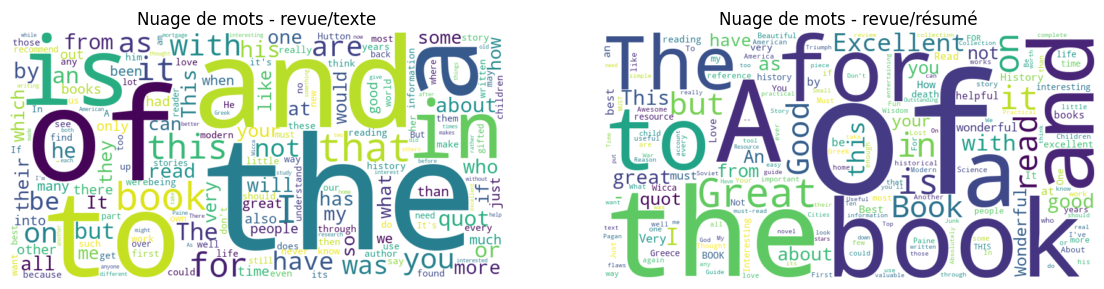

In [71]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

dfRevue_positive = dfRevue[dfRevue["revue/score"] >= 3.0]

compteur_mots_texte = Counter()
for mots in dfRevue_positive["revue/texte"]:
    compteur_mots_texte.update(mots)

compteur_mots_resume = Counter()
for mots in dfRevue_positive["revue/résumé"]:
    compteur_mots_resume.update(mots)

wordcloud_texte = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(compteur_mots_texte)
wordcloud_resume = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(compteur_mots_resume)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_texte, interpolation="bilinear")
plt.axis("off")
plt.title("Nuage de mots - revue/texte")

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_resume, interpolation="bilinear")
plt.axis("off")
plt.title("Nuage de mots - revue/résumé")

plt.show()


# Les Livres les plus commentés (évalués)

In [72]:
compteur_livre = Counter(dfRevue["Titre"])

df_livre = pd.DataFrame(compteur_livre.items(), columns=["Titre", "Nb Occurrences"])
df_livre["%"] = (df_livre["Nb Occurrences"] / df_livre["Nb Occurrences"].sum()) * 100
df_livre = df_livre.sort_values(by="Nb Occurrences", ascending=False)

df_livre.head(20)

,Titre,Nb Occurrences,%
95,The Triumph of the Moon: A History of Modern P...,66,6.6
71,How to Own Your Home Years Sooner - without ma...,45,4.5
97,Lifetimes: The Beautiful Way to Explain Death ...,41,4.1
53,Thomas Paine : Collected Writings : Common Sen...,41,4.1
29,The Rabbi's Cat,40,4.0
124,Small-Circle Jujitsu,37,3.7
87,Lenin's Tomb: The Last Days of the Soviet Empire,37,3.7
1,Whispers of the Wicked Saints,32,3.2
111,The Gifted Adult: A Revolutionary Guide for Li...,28,2.8
43,Olympic Wandering: Time Travel Through Greece,28,2.8


# Les Livres les mieux notés

In [73]:
df_livres_notes = dfRevue[dfRevue["revue/score"] > 3.0]

compteur_livre = Counter(df_livres_notes["Titre"])

df_livre_notes = pd.DataFrame(compteur_livre.items(), columns=["Titre", "Nb Occurrences"])
df_livre_notes["%"] = (df_livre_notes["Nb Occurrences"] / df_livre_notes["Nb Occurrences"].sum()) * 100
df_livre_notes = df_livre_notes.sort_values(by="Nb Occurrences", ascending=False)

df_livre_notes.head(20)

,Titre,Nb Occurrences,%
92,The Triumph of the Moon: A History of Modern P...,58,7.099143
51,Thomas Paine : Collected Writings : Common Sen...,38,4.651163
93,Lifetimes: The Beautiful Way to Explain Death ...,37,4.528764
69,How to Own Your Home Years Sooner - without ma...,37,4.528764
28,The Rabbi's Cat,35,4.283966
85,Lenin's Tomb: The Last Days of the Soviet Empire,33,4.039168
117,Small-Circle Jujitsu,28,3.427173
41,Olympic Wandering: Time Travel Through Greece,24,2.937576
1,Whispers of the Wicked Saints,23,2.815177
104,The Gifted Adult: A Revolutionary Guide for Li...,21,2.570379


# Dans quels genres les lecteurs donnent-ils des évaluations positives et négatives ?

In [74]:
df_merged = dfRevue.merge(dfBook, on="Titre", how="inner")

df_positive = df_merged[df_merged["revue/score"] >= 5.0]
df_negative = df_merged[df_merged["revue/score"] < 5.0]

compteur_genres_positive = Counter()
compteur_genres_negative = Counter()

for genres in df_positive["Genre"]:
    compteur_genres_positive.update(genres)

for genres in df_negative["Genre"]:
    compteur_genres_negative.update(genres)

compteur_genres_net = {genre: compteur_genres_positive[genre] - compteur_genres_negative[genre]
                       for genre in set(compteur_genres_positive.keys()).union(compteur_genres_negative.keys())}

genres_positifs = {k: v for k, v in compteur_genres_net.items() if v >= 0}
genres_negatifs = {k: v for k, v in compteur_genres_net.items() if v < 0}

df_genres_positifs = pd.DataFrame(genres_positifs.items(), columns=["Genre", "Score Net"]).sort_values(by="Score Net", ascending=False)
df_genres_negatifs = pd.DataFrame(genres_negatifs.items(), columns=["Genre", "Score Net"]).sort_values(by="Score Net", ascending=True)

print("Genres avec le plus d'évaluations positives :")
display(df_genres_positifs.head(20))

print("\nGenres avec le plus d'évaluations négatives :")
display(df_genres_negatifs.head(20))



Genres avec le plus d'évaluations positives :


,Genre,Score Net
2,History,52
9,Relationships,34
7,Family,34
6,Spirit,29
10,Mind,29
4,Body,29
18,Graphic Novels,16
5,Comics,16
8,Local author,8
0,Fiction,8



Genres avec le plus d'évaluations négatives :


,Genre,Score Net
3,Reference,-6
5,Foreign Language Study,-6
6,Social Science,-6
0,Computers,-5
9,Gardening,-3
2,Disciplines,-2
4,Language Arts,-2
1,Biography,-1
7,Autobiography,-1
8,Performing Arts,-1


# Les 10 auteurs les mieux notés avec 5 étoiles et Les 10 auteurs les mieux notés avec 1 étoile

In [75]:
df_merged = dfRevue.merge(dfBook, on="Titre", how="inner")

df_auteurs_5_etoiles = df_merged[df_merged["revue/score"] == 5.0]
df_auteurs_1_etoile = df_merged[df_merged["revue/score"] == 1.0]

compteur_auteurs_5 = Counter()
compteur_auteurs_1 = Counter()

for auteurs in df_auteurs_5_etoiles["Auteurs"]:
    compteur_auteurs_5.update(auteurs) 

for auteurs in df_auteurs_1_etoile["Auteurs"]:
    compteur_auteurs_1.update(auteurs)

df_auteurs_5 = pd.DataFrame(compteur_auteurs_5.items(), columns=["Auteur", "Nb Occurrences"]).sort_values(by="Nb Occurrences", ascending=False)
df_auteurs_1 = pd.DataFrame(compteur_auteurs_1.items(), columns=["Auteur", "Nb Occurrences"]).sort_values(by="Nb Occurrences", ascending=False)

print("Top 10 des auteurs les mieux notés (5 étoiles) :")
display(df_auteurs_5.head(10))

print("\n Top 10 des auteurs les plus mal notés (1 étoile) :")
display(df_auteurs_1.head(10))


Top 10 des auteurs les mieux notés (5 étoiles) :


,Auteur,Nb Occurrences
24,Ronald Hutton,50
11,Thomas Paine,36
25,Bryan Mellonie,30
18,David Remnick,28
5,Joann Sfar,28
33,Wally Jay,21
28,Mary-Elaine Jacobsen,16
4,Jim Fay,15
34,Sandra Benitez,11
6,David Hatcher Childress,11



 Top 10 des auteurs les plus mal notés (1 étoile) :


,Auteur,Nb Occurrences
7,Ronald Hutton,4
13,Steven J. Milloy,4
1,Joann Sfar,3
2,David Hatcher Childress,3
4,Barbara Schave Klein,2
10,Wally Jay,2
12,Bill Nichols,2
0,Jerry Baker,1
3,Thomas Paine,1
5,Tom Birdseye,1


# Existe t-il une corrélation entre l’éditeur et le commentaire (score)

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

df_merged = dfRevue.merge(dfBook, on="Titre", how="inner")[["Editeur", "revue/score"]].dropna()

label_encoder = LabelEncoder()
df_merged["Editeur_Encoded"] = label_encoder.fit_transform(df_merged["Editeur"])

X = df_merged[["Editeur_Encoded"]]
y = df_merged["revue/score"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
r2_knn = r2_score(y_test, y_pred_knn)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)
                 
print(f"Score R² (KNN Regressor) : {r2_knn:.4f}")
print(f"Score R² (Random Forest Regressor) : {r2_rf:.4f}")

Score R² (KNN Regressor) : -0.1644
Score R² (Random Forest Regressor) : 0.0197


# Existe-t-il une corrélation entre les auteurs et le commentaire (score)

In [77]:
df_merged = dfRevue.merge(dfBook, on="Titre", how="inner")[["Auteurs", "revue/score"]].dropna()

mlb = MultiLabelBinarizer() 
df_authors_encoded = pd.DataFrame(mlb.fit_transform(df_merged["Auteurs"]), columns=mlb.classes_)

df_merged = df_merged.drop(columns=["Auteurs"]).reset_index(drop=True)
df_merged = pd.concat([df_merged, df_authors_encoded], axis=1)

X = df_merged.drop(columns=["revue/score"])
y = df_merged["revue/score"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
r2_knn = r2_score(y_test, y_pred_knn)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)
                 
print(f"Score R² (KNN Regressor) : {r2_knn:.4f}")
print(f"Score R² (Random Forest Regressor) : {r2_rf:.4f}")

Score R² (KNN Regressor) : -0.0744
Score R² (Random Forest Regressor) : 0.0137


In [78]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.device_count())
print(torch.cuda.get_device_name(0))


True
1
NVIDIA GeForce RTX 4060 Laptop GPU


# Distribution des sentiments négatifs, neutres et positifs dans l'ensemble du corpus

 Device set to: CUDA


Device set to use cuda:0


                                          revue/texte sentiment_pred
0   With the publication of Everett Ferguson's boo...        NEUTRAL
1   Everett Ferguson approaches the subject of ear...       POSITIVE
2   This book is a continual resource It is so bib...       POSITIVE
3   This is a very useful and thorough text book I...       POSITIVE
4   This book is both a history and a photo album ...       NEGATIVE
..                                                ...            ...
95  I think this book is great I love DHC's writin...       POSITIVE
96  Let's face it: this isn't a very good book The...        NEUTRAL
97  this another book in the Lost Cities Series ar...       POSITIVE
98  This should be on the desk or in the back pock...       POSITIVE
99  I recommend this book because is good to have ...       POSITIVE

[100 rows x 2 columns]


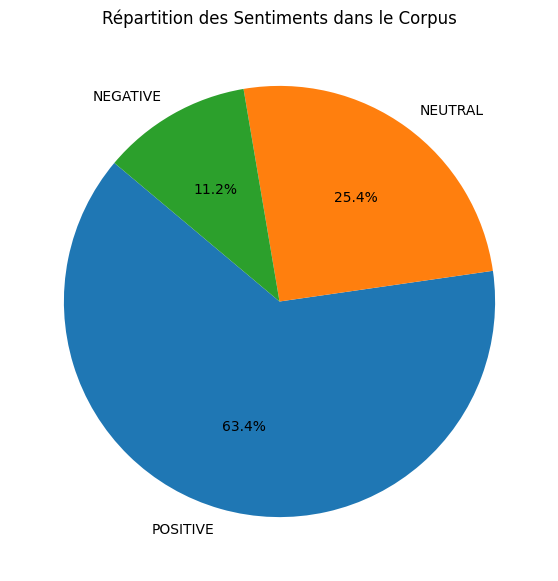

In [79]:
from transformers import pipeline

device = 0 if torch.cuda.is_available() else -1
print(f" Device set to: {'CUDA' if device == 0 else 'CPU'}")

analyser_sentiment = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment", device=device)

df_merged = dfRevue.merge(dfBook, on="Titre", how="inner")[["Titre","revue/texte", "Genre"]].dropna()

df_merged["revue/texte"] = df_merged["revue/texte"].apply(lambda x: " ".join(x) if isinstance(x, list) else x)

df_merged["revue/texte"] = df_merged["revue/texte"].apply(lambda x: x[:1500] if len(x) > 1500 else x)

batch_size = 16
textes = df_merged["revue/texte"].tolist()
sentiments = []

for i in range(0, len(textes), batch_size):
    batch = textes[i : i + batch_size]
    predictions = analyser_sentiment(batch)
    sentiments.extend([pred["label"] for pred in predictions])

df_merged["sentiment_pred"] = sentiments

label_mapping = {"LABEL_0": "NEGATIVE", "LABEL_1": "NEUTRAL", "LABEL_2": "POSITIVE"}

df_merged["sentiment_pred"] = df_merged["sentiment_pred"].map(label_mapping)

print(df_merged[["revue/texte", "sentiment_pred"]].head(100))

import matplotlib.pyplot as plt

sentiment_counts = df_merged["sentiment_pred"].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct="%1.1f%%", startangle=140)
plt.title("Répartition des Sentiments dans le Corpus")
plt.show()


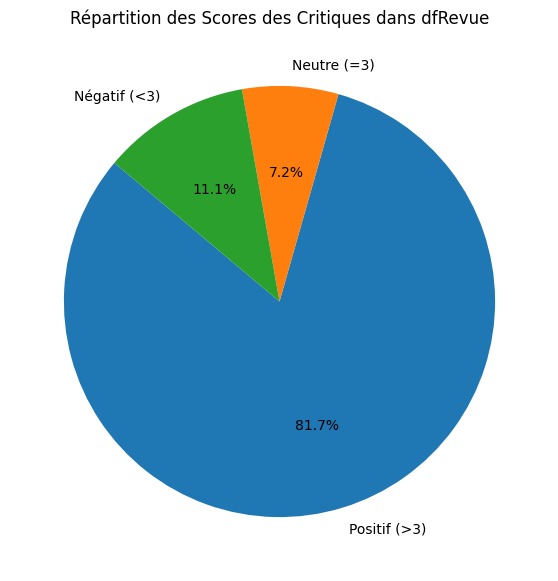

In [80]:
score_counts = {
    "Positif (>3)": (dfRevue["revue/score"] > 3).sum(),
    "Neutre (=3)": (dfRevue["revue/score"] == 3).sum(),
    "Négatif (<3)": (dfRevue["revue/score"] < 3).sum()
}

plt.figure(figsize=(7, 7))
plt.pie(score_counts.values(), labels=score_counts.keys(), autopct="%1.1f%%", startangle=140)
plt.title("Répartition des Scores des Critiques dans dfRevue")
plt.show()


# Nombre le plus élevé de critiques négatives/positives/neutres sur les livres

In [81]:
sentiment_counts = df_merged.groupby(['Titre', 'sentiment_pred']).size().unstack(fill_value=0)

sentiment_counts.columns = ['Négatif', 'Neutre', 'Positif']

top_negatifs = sentiment_counts.nlargest(10, 'Négatif')

top_neutres = sentiment_counts.nlargest(10, 'Neutre')

top_positifs = sentiment_counts.nlargest(10, 'Positif')

print("Top 10 des livres avec le plus de critiques négatives :")
print(top_negatifs)
print("\nTop 10 des livres avec le plus de critiques neutres :")
print(top_neutres)
print("\nTop 10 des livres avec le plus de critiques positives :")
print(top_positifs)


Top 10 des livres avec le plus de critiques négatives :
                                                    Négatif  Neutre  Positif
Titre                                                                       
Junk Science Judo: Self-Defense against Health ...       13       7        6
The Triumph of the Moon: A History of Modern Pa...        7      29       30
The Gifted Adult: A Revolutionary Guide for Lib...        5      10       13
Lenin's Tomb: The Last Days of the Soviet Empire          4      12       21
Lost Cities of North & Central America (Lost Ci...        4       6       12
Lifetimes: The Beautiful Way to Explain Death t...        3       8       30
Raising Gifted Kids: Everything You Need to Kno...        3       3       13
Small-Circle Jujitsu                                      3       4       30
Representing Reality: Issues and Concepts in Do...        2       0        1
The Rabbi's Cat                                           2      12       26

Top 10 des livres a

# Existe-t-il une corrélation entre le prix et la revue (le score de la revue)

In [89]:
from sklearn.linear_model import LinearRegression

X = dfRevue[['Prix']]
y = dfRevue['revue/score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=60)

knn = KNeighborsRegressor(n_neighbors=5)
rf = RandomForestRegressor(n_estimators=100, random_state=42)
lr = LinearRegression()

knn.fit(X_train, y_train)
rf.fit(X_train, y_train)
lr.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_lr = lr.predict(X_test)

r2_knn = r2_score(y_test, y_pred_knn)
r2_rf = r2_score(y_test, y_pred_rf)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Coefficient de détermination R^2 pour k-NN: {r2_knn:.2f}")
print(f"Coefficient de détermination R^2 pour Random Forest: {r2_rf:.2f}")
print(f"Coefficient de détermination R^2 pour Régression Linéaire: {r2_lr:.2f}")

Coefficient de détermination R^2 pour k-NN: -0.08
Coefficient de détermination R^2 pour Random Forest: -0.08
Coefficient de détermination R^2 pour Régression Linéaire: -0.01
